<a href="https://colab.research.google.com/github/Viki183/FAKE-NEWS-DETECTION/blob/main/HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREDICTING CARDIOVASCULAR DISEASE USING MACHINE LEARNING ALGORITHMS**

IMPORTING LIBRARIES:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOADING THE DATA:

In [4]:
dataframe=pd.read_csv("/content/heart.csv")

In [5]:
dataframe.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


DATA ANALYSIS

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
dataframe.shape

(303, 14)

In [8]:
dataframe.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
dataframe.nunique(axis=0)

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [10]:
pd.set_option("display.float","{:.2f}".format)
dataframe.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [11]:
dataframe.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
dataframe.target.value_counts()

1    165
0    138
Name: target, dtype: int64

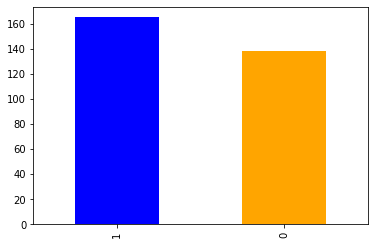

In [13]:
dataframe.target.value_counts().plot(kind="bar",color=["blue","orange"])

In [16]:
correlation=dataframe.corr()
pd.DataFrame(correlation['target']).sort_values(by='target',ascending=False)

,target
target,1.00
cp,0.43
thalach,0.42
slope,0.35
restecg,0.14
fbs,-0.03
chol,-0.09
trestbps,-0.14
age,-0.23
sex,-0.28


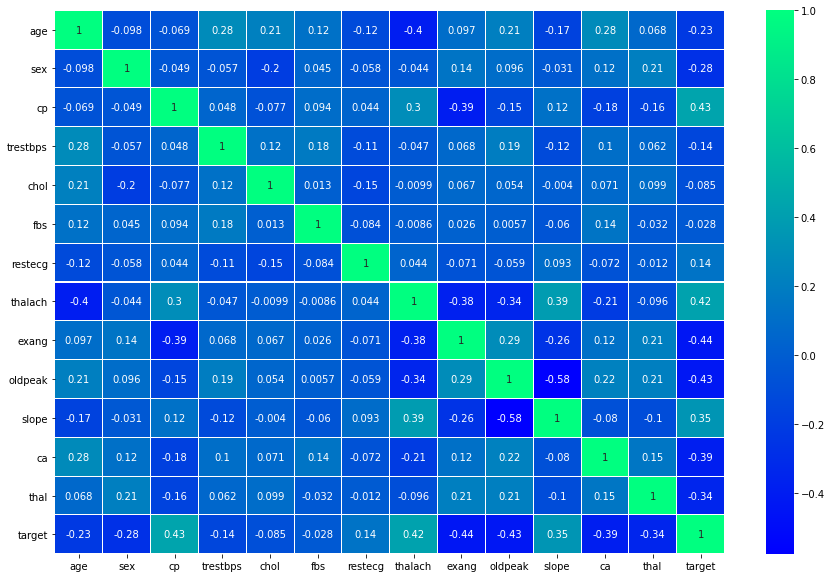

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(dataframe.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()

From the above heatmap, we can understand that Chest pain(cp) and target have positive correlation. It means that whose has large risk of chest pain results in greater chance to have heart disease.
In addition to chest pain, thalach,slope and restecg have positive correlation with target.

Then, exercise induced angina(exang) and target has negative correlation which means when we exercise, heart requires more blood, but narrowed arteries slow down the blood flow.
In addition to ca,oldpeak,thal have negative correlation with target.

Now, we can find the relationship between target with each features with the help of histogram.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d9a3e0050>,
      dtype=object)

<Figure size 576x432 with 0 Axes>

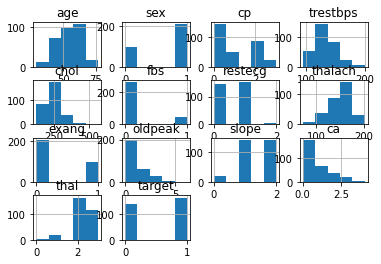

In [33]:
fig=plt.figure(figsize=(8,6))
dataframe.hist(bins=5)

Now, we shall find relationship between target and mostly risk factors/features which cause cardiovascular disease.

Text(0.5, 1.0, 'Chest Pain vs Heart Disease')

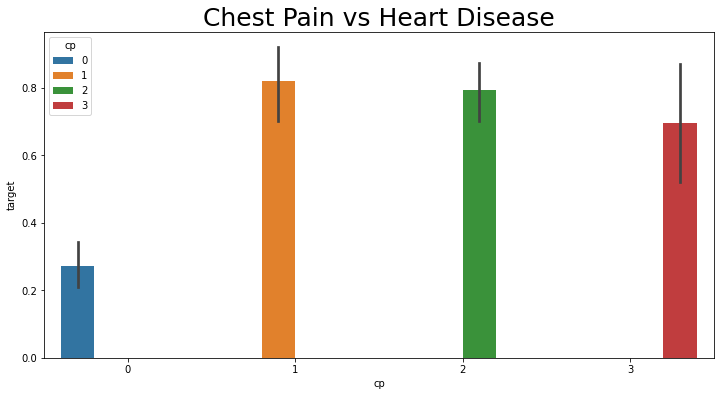

In [43]:
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(y='target',x='cp',hue='cp',ax=ax,data=dataframe)
plt.title('Chest Pain vs Heart Disease',size=25)